# Homework 4 - Hard coding

## Libraries

In [1]:
import numpy as np
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

# 1. Hashing task!

### Implementation of Bloom Filter:

1. Bloom Filter is used to test whether an element is a member of a set. 
2. False positive matches are possible, but false negatives are not – in other words, a query returns either "possibly in set" or "definitely not in set"

In [2]:
#size of the dataset which we are going to load into filter.
n = size1 = 100000000 
size2 = 39000000

#### Calculating the size of the filter and number of hash function needed to achieve probability of false positive

##### Below is the false positive probability of the filter "p"
\begin{equation*}
p  = (1-{e^{-kn/m}})^k
\end{equation*}

#### Lets assume probability that p = 0.05 
###### 1. Now we calculate the m size of the filter below formulae
\begin{equation*}
m   = -\frac{n      \ln p}{(\ln     2)^2} 
\end{equation*}

###### 2. Similarly we can calculate number of hash functions needed using below formulae
\begin{equation*}
k   = \frac{m}{n} {\ln        2}
\end{equation*}

In [3]:
#probability of false positive result
p = 0.05

#size of the Bloom filter by using formula
m = int(np.ceil(-(n*np.log(p))/(np.log(2))**2))
print(m)

# Number of hash functions needed in order to achieve that percentage of false positive probability
k = int(round((m/n)*np.log(2)))
print(k)

623522423
4


#### Defining our own hashing function below

###### A good hashing function should 
1. Efficiently computable.
2. Should uniformly distribute the keys (Each table position equally likely for each key)


* The below hashing function using a random coefficients to uniformly distribute the keys over filter.
* The ASCII unicode values of characters ranges from 0 - 255 are used to compute hashing value.

In [4]:
#Defining k=4 Hash Functions 
coef1 = random.choices(range(m), k = 20)
def hash1(astring, tablesize):
    sums = 0
    for pos in range(len(astring)-1):
        sums += coef1[pos]*ord(astring[pos])
    return sums%tablesize

coef2 = random.choices(range(m), k = 20)
def hash2(astring, tablesize):
    sums = 0
    for pos in range(len(astring)-1):
        sums += coef2[pos]*ord(astring[pos])
    return sums%tablesize

coef3 = random.choices(range(m), k = 20)
def hash3(astring, tablesize):
    sums = 0
    for pos in range(len(astring)-1):
        sums += coef3[pos]*ord(astring[pos])
    return sums%tablesize

coef4 = random.choices(range(m), k = 20)
def hash4(astring, tablesize):
    sums = 0
    for pos in range(len(astring)-1):
        sums += coef4[pos]*ord(astring[pos])
    return sums%tablesize

#### Defining our Bloom Filter Method
* The bloom filter essentially consists of a bit-vector or bit-list(a list containing only either 0 or 1-bit value) of length m, initially all values set to 0, as shown below.
* Each Passwords read from passwords1 file and added into bloom filter by calculating all hashing values.
* A password is added to filter such that corresponding hash values on filter is changed to 1
* Once completed adding passwords next set of passwords read from another file passwords2 
* Computing hash values of each passwords check if corresponding filter values 
* If all values corresponding to hash keys are 1 then element possibly in set 
* If otherwise element definitely not in the set

In [5]:
#Filter Function Arguments two passwords list and then size of the Filter
def BloomFilter(m):
    #size1 = len(passwords1)
    #size2 = len(passwords2)
    start = time.time()
    #creating Bloom Filter initially everything will be 0
    Filter = np.zeros(m)
    #passwords possibly present in the filter counter probably duplicates
    maybe=0
    # add all passwords1 to the filter
    file1 = open("passwords1.txt", "r")
    line = file1.readline().strip()
    while line:
        if Filter[hash1(line,m)] == 0:
            Filter[hash1(line,m)] = 1
            
        if Filter[hash2(line,m)] == 0:
            Filter[hash2(line,m)] = 1
            
        if Filter[hash3(line,m)] == 0:
            Filter[hash3(line,m)] = 1
            
        if Filter[hash4(line,m)] == 0:
            Filter[hash4(line,m)] = 1
    
        line = file1.readline().strip()
        
        
    
    file1.close()
    # check all passwords2 presence in the filter
    file2 = open("passwords2.txt", "r")
    line2 = file2.readline().strip()
    while line2:
        #getting all hash values of each passwords
        f = 0
        if Filter[hash1(line2,m)] == 0:
            f +=1
        if Filter[hash2(line2,m)] == 0:
            f +=1
        if Filter[hash3(line2,m)] == 0:
            f +=1
        if Filter[hash4(line2,m)] == 0:
            f +=1
            
        j += 1
        line2 = file2.readline().strip()
         
        #only if all the values are 1(f==0) there is a duplicate
        if f == 0:
            maybe += 1
        else:
            pass
            
    file2.close()
    end = time.time()
    # printing the final results including time taken
    print('Number of hash function used: ', k)
    print('Number of duplicates detected: ', maybe)
    print('Probability of false positives: ', p)
    print('Execution time: ', end-start)

In [6]:
#calling the BloomFilter method to perform all activity
BloomFilter(m)

0
39000000
Number of hash function used:  4
Number of duplicates detected:  15257051
Probability of false positives:  0.05
Execution time:  3865.0093734264374


## 2. Alphabetical Sort

### Counting sort

this algorithm is based on this video
https://www.youtube.com/watch?v=TTnvXY82dtM

In [23]:
enter = [9, 5, 7, 3, 10, 5, 3]

In [24]:
def countingSort(enter):
    
    # list of index (length from min value of enter to max)
    index = []
    for i in range(min(enter), max(enter)+1):
        index.append(i) 
        
    # dict with key:index, value: frequency of each number in enter   
    Count1 = {}                
    for i in range(len(index)):
        Count1[index[i]] = 0      
    for i in range(len(enter)):
        Count1[enter[i]] += 1
    
    # dict with key: index of each number, value: index of each number plus index of the previus number
    sumCount = {}            
    for i in range(len(Count1)):
        sumCount[index[i]] = Count1[index[i]]
        if i != 0:
            sumCount[index[i]] += sumCount[index[i]-1]
    
    # a list with sorted numbers
    sort = [0]*len(enter)      
    for i in range(len(sort)):
        sort[sumCount[enter[i]]-1] = enter[i]
        sumCount[enter[i]] -= 1
             
    return sort

In [25]:
print(countingSort(enter))

[3, 3, 5, 5, 7, 9, 10]


###  Letters in alphabetical order

In [26]:
alpha = {1:'a', 2:'b', 3:'c', 4:'d', 5:'e', 6:'f', 7:'g', 8:'h', 9:'i', 10:'j', 11:'k', 12:'l', 13:'m', 14:'n',
         15:'o', 16:'p', 17:'q', 18:'r', 19:'s', 20:'t', 21:'u', 22:'v', 23:'w', 24:'x', 25:'y', 26:'z'}

alpha1 = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':6, 'g':7, 'h':8, 'i':9, 'j':10, 'k':11, 'l':12, 'm':13, 'n':14,
         'o':15, 'p':16, 'q':17, 'r':18, 's':19, 't':20, 'u':21, 'v':22, 'w':23, 'x':24, 'y':25, 'z':26}

In [27]:
l = ['q','w','e','r','t','y','u','i','o','p','a','s','d','f','g','h','j','k','l','z','x','c','v','b','n','m',]

In [28]:
def alphaSort(letters):
    # using dicts alpha and alpha1 i created the fixed order of words in general
    # then after the assignment "word:value" i can use the countingSort
    num_l = []
    for i in letters:
        num_l.append(alpha1[i])

    sort_num_l = countingSort(num_l)
    sort_l = []
    for i in sort_num_l:
        sort_l.append(alpha[i]) 

    return sort_l


In [29]:
print(alphaSort(l))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


### Complexity(alphaSort)

#### Theoretically

countingSort():
- 1st for --> n (where n is the difference between the biggest number and the smallest one)
- 2nd for --> n (cause this for is scanning through 'index'(lenght n))
- 3rd for --> it is scannung through 'enter' and len(enter) = m
- 4th for --> it is scanning through 'Count1'(lenght n)
- 5th for --> it is scanning through 'sort'(lenght n)

##### so the complexity is O(3n + 2m) --> O(n)
-------------------------------------------------

alphaSort():
- 1st for --> it is scanning through 'letters' (lenght n)
- then n --> the complexity of countingSort()
- 2nd for --> n cause it is scanning through the same lenght of letter 

###### so the complexity is O(2n) + O(n) = O(n)


#### Empirically

Since the code has to scan all the elements of the input vector, the theoretically complexity and the empirically one are the same.

### Words in alphabetical order

In [32]:
def sortWords(words):
    # just one word
    if len(words) <= 1:
        return words

    sort1 = []

    for i in range(len(words)): 
        if i == 0: # first word has no reference to be sorted so just appending
            sort1.append(words[i])
        else:
            # sorting words 2 by 2
            for k in range(len(sort1)):
                j = 0
                # if the first letters are the same then go to the first 2 different letters
                while j < len(words[i])-1 and j < len(sort1[k])-1 and words[i][j] == sort1[k][j]:
                    j += 1
                
                # all rules to follow in order to sort the words
                
                # oak, oak hill
                if sort1[k][j] == ' ' and words[i][j] != ' ':
                    sort_l = [sort1[k], words[i]]
                    if k == len(sort1)-1:
                        sort1.append(words[i])
                        break           
      
                elif sort1[k][j] != ' ' and words[i][j] == ' ':
                    sort_l = [words[i], sort1[k]]
                    sort1.insert(k, words[i])
                    break

                # be, been
                elif j == len(sort1[k])-1 and j != len(words[i])-1 and words[i][j] == sort1[k][j]:
                    sort_l = [sort1[k], words[i]] 
                    if k == len(sort1)-1:
                        sort1.append(words[i])
                        break           

                elif j != len(sort1[k])-1 and j == len(words[i])-1 and words[i][j] == sort1[k][j]:
                    sort_l = [words[i], sort1[k]]
                    sort1.insert(k, words[i])
                    break
                
                # for two different letters
                else:
                    l = [words[i][j], sort1[k][j]]
                    sort_l = alphaSort(l) # sort them using alphaSort
                    
                    if sort_l == l:
                        sort1.insert(k, words[i])
                        break
                    else:
                        if k == len(sort1)-1:
                            sort1.append(words[i])
                            break                

    return sort1

In [33]:
k = ['oak hill','a', 'oakley park', 'aris', 'sapienza', 'ok', 'oakley river', 'oasis', 'oak ridge', 'oak', 'been', 'be']
sortWords(k)

['a',
 'aris',
 'be',
 'been',
 'oak',
 'oak hill',
 'oak ridge',
 'oakley park',
 'oakley river',
 'oasis',
 'ok',
 'sapienza']

### Complexity(sortWords)

#### Theoretically

alphaSort():
- 1st for --> it is scanning through 'letters' (lenght n)
- then n --> the complexity of countingSort()
- 2nd for --> n cause it is scanning through the same lenght of letter 

##### so the complexity is O(2n) + O(n) = O(n)
------------------------------------

sortWords():
- 1st for: it scan through words(lenght n)
- 2nd for: it's called n times and it scan through all the elements of 'sort1', so n*k whre k <= n --> n^2
- 1st while: it's called n^2 times and it scan through max m, where m is the lenght of the longest words in the list
- alphaSort() = it's called n^2 times and it has a complexity of n(as described before), so n^3

##### so the complexity is O(2*m*n^2) = O(mn^2)


#### Empirically

the empirically complexity needs an assumption:
- if the lenght of the list of words goes to infinite, m << n, so we can consider m not influence

###### then the empirically complexity is O(n^2)
------------------------------------------------
- if m == n

###### then the empirically complexity is O(n^3)
------------------------------------------------
- if m >> n 

###### then the empiricallu complexity is O(m)

## 3. Find similar wines!

### Implement the k-means clustering algorithm and test it on wines dataframe.

#### Organizing the data

For this task, we need to use the Wine Data Set.
However, looking at the data, the file wine.data miss of attributes and features, so we can add them by looking at the main page of the dataset.

In [2]:
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavonoids', 'Nonflavanoid phenols',
           'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [3]:
wines = pd.read_csv(r"C:\Users\Notebook HP\Desktop\Homeworks\HW4\Exercise 3\wine.data", names = columns)
wines = pd.DataFrame(wines)
wines.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW4\Exercise 3\wine.names') as f:
    names = f.read()
names.split('\n');

Reading the wine.names file, we know that these are:
1. wines grown in the same region in Italy but derived from three different cultivars (Class).
2. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Therefore we can imagine that the analysis will lead to the distinction of these 13 categories with respect to the three types of wines.

#### Studying the data

In [5]:
wines.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
wines.shape

(178, 14)

We plot two random features in respect to the attribute Class.

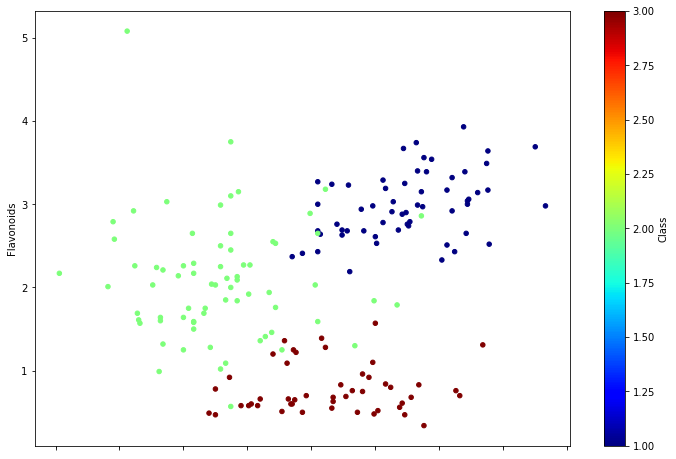

In [8]:
wines.plot.scatter(x = 'Alcohol', y = 'Flavonoids', c = 'Class', figsize=(12,8), colormap='jet');

We can already see three possible clusters.

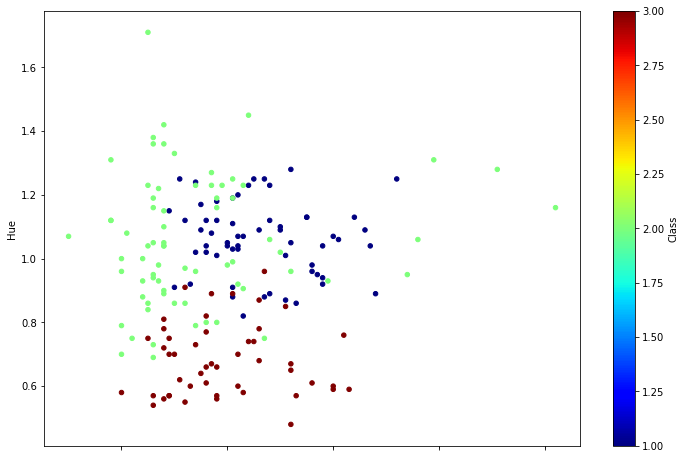

In [9]:
wines.plot.scatter(x = 'Magnesium', y = 'Hue', c = 'Class', figsize=(12,8), colormap='jet');

Even in this case, we can see at least two possible clusters, so we can imagine that this distribution depends on the 3 different classes.
Therefore we'll try to consider K = 3 clusters in our analysis.

### Implement k-means

We'll consider our first example, so features 'Alcohol' and 'Flavonoids'.

In [10]:
#We define a C array of all 178 rows and two features 'Alcohol' and 'Flavonoids'.
d = wines.iloc[:, [1, 7]].values
d[:5]

array([[14.23,  3.06],
       [13.2 ,  2.76],
       [13.16,  3.24],
       [14.37,  3.49],
       [13.24,  2.69]])

In [11]:
#Number of data points
n = 178
#Number of features to consider. 
m = 2 
#Number of iteractions for the centroids positions.
iteractions = 100
#Number of desired clusters.
K = 3

###### Inizializing the centroids

In [12]:
#Numpy array of the centroids.
Cent = np.array([]).reshape(m,0) 
Cent

array([], shape=(2, 0), dtype=float64)

In [13]:
#Initializing random centroids
for i in range(K):
    #Random number of row
    r = rd.randint(0, n-1)
    #Centroids of K elements by column
    Cent = np.c_[Cent, d[r]]
Cent

array([[12.07, 12.08, 12.  ],
       [ 2.65,  2.29,  1.64]])

In [14]:
EDist = np.array([]).reshape(n, 0)
for k in range(K):
    #Euclidean distance from elements of d and k random centroid
    Dist = np.sum((d - Cent[:,k])**2, axis = 1)
    #Adding column of distances from the k centroid
    EDist = np.c_[EDist, Dist]
#Index that gives the nearest centroid from the data point in d
nearp = np.argmin(EDist, axis = 1) + 1
nearp

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 3, 1,
       1, 2, 3, 3, 3, 1, 2, 1, 2, 3, 2, 3, 3, 1, 2, 1, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 3, 1, 1, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       1, 2, 2, 3, 2, 2, 3, 2, 3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [15]:
#Initializing dictionary D 
D={}
for k in range(K):
    #D key value k+1 (name of the centroid)
    D[k+1]=np.array([]).reshape(2,0)
    
for i in range(n):
    #Assigning each value of d to the nearest centroid k+1
    D[nearp[i]]=np.c_[D[nearp[i]],d[i]]
     
for k in range(K):
    #Making the transpose for plotting the data
    D[k+1]=D[k+1].T
    
for k in range(K):
    #Giving a better value (mean of nearest points) to the centroid
     Cent[:,k]=np.mean(D[k+1],axis=0)

###### Improving the centroids, thus the clusters

Now we can repeat the same algorithm for a certain number of iteractions, to improve the clusters.

In [16]:
for i in range(iteractions):
     
    EDist=np.array([]).reshape(n,0)
    
    for k in range(K):
        Dist = np.sum((d-Cent[:,k])**2,axis=1)
        EDist = np.c_[EDist, Dist]
    nearp = np.argmin(EDist, axis=1) + 1
     
    D={}
    for k in range(K):
        D[k+1]=np.array([]).reshape(2,0)
    for i in range(n):
        D[nearp[i]]=np.c_[D[nearp[i]],d[i]]

    for k in range(K):
        D[k+1]=D[k+1].T

    for k in range(K):
        Cent[:,k]=np.mean(D[k+1],axis=0)
    defres = D

#### Plotting the result.

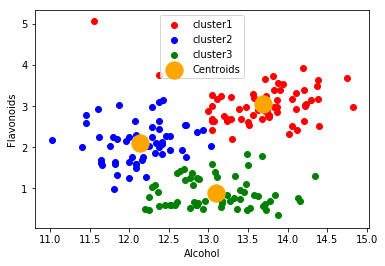

In [17]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(defres[k+1][:,0], defres[k+1][:,1], c = color[k], label = labels[k])
plt.scatter(Cent[0,:],Cent[1,:], s = 300, c = 'orange', label = 'Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Flavonoids')
plt.legend()
plt.show()

#### Function for clustering

In [18]:
def clustering(i,j):
    d = wines.iloc[:, [i, j]].values
    n = d.shape[0] 
    m = d.shape[1] 
    iteractions = 100
    K = 3 
    Cent = np.array([]).reshape(m,0)
    
    #Initializing random centroids
    for i in range(K):
        #Random number of row
        r = rd.randint(0, n-1)
        #Centroids of K elements by column
        Cent = np.c_[Cent, d[r]]
    
    EDist = np.array([]).reshape(n, 0)
    for k in range(K):
        #Euclidean distance from elements of d and k random centroid
        Dist = np.sum((d - Cent[:,k])**2, axis = 1)
        #Adding column of distances from the k centroid
        EDist = np.c_[EDist, Dist]
    #Index that gives the nearest centroid from the data point in d
    nearp = np.argmin(EDist, axis = 1) + 1
    
    #Initializing dictionary D 
    D={}
    for k in range(K):
        #D key value k+1 (name of the centroid)
        D[k+1]=np.array([]).reshape(2,0)

    for i in range(n):
        #Assigning each value of d to the nearest centroid k+1
        D[nearp[i]]=np.c_[D[nearp[i]],d[i]]

    for k in range(K):
        #Making the transpose for plotting the data
        D[k+1]=D[k+1].T

    for k in range(K):
        #Giving a better value (mean of nearest points) to the centroid
         Cent[:,k]=np.mean(D[k+1],axis=0)
            
    #Iteraction of the same script...
    for i in range(iteractions):
     
        EDist=np.array([]).reshape(n,0)

        for k in range(K):
            Dist = np.sum((d-Cent[:,k])**2,axis=1)
            EDist = np.c_[EDist, Dist]
        nearp = np.argmin(EDist, axis=1) + 1

        D={}
        for k in range(K):
            D[k+1]=np.array([]).reshape(2,0)
        for i in range(n):
            D[nearp[i]]=np.c_[D[nearp[i]],d[i]]

        for k in range(K):
            D[k+1]=D[k+1].T

        for k in range(K):
            Cent[:,k]=np.mean(D[k+1],axis=0)
        defres = D
    
    return defres

### Looking at the plots.

In [19]:
def clust(s):
    
    columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavonoids', 'Nonflavanoid phenols',
               'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
    
    for i in range(14):
        
        if i != s:            
            R = clustering(s,i)            
            color=['red','blue','green']
            labels=['cluster1','cluster2','cluster3']            
            for k in range(K):
                plt.scatter(R[k+1][:,0],R[k+1][:,1],c=color[k],label=labels[k])
            
            plt.xlabel(columns[s])
            plt.ylabel(columns[i])
            plt.legend()
            plt.show()

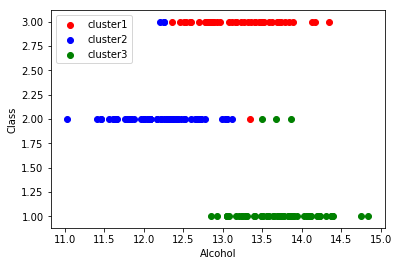

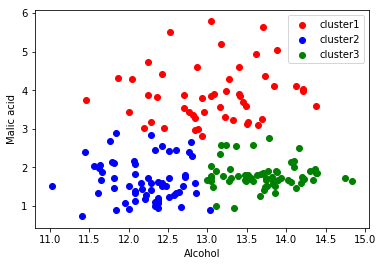

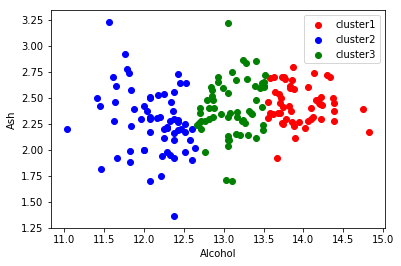

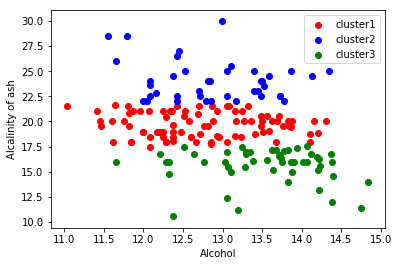

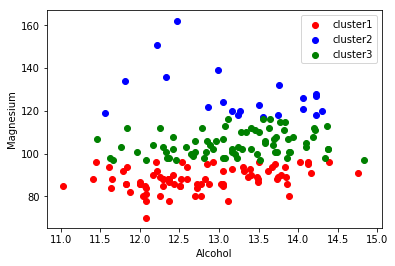

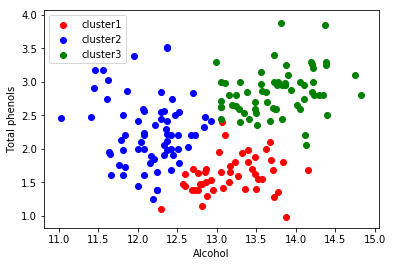

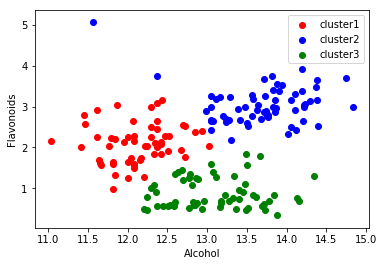

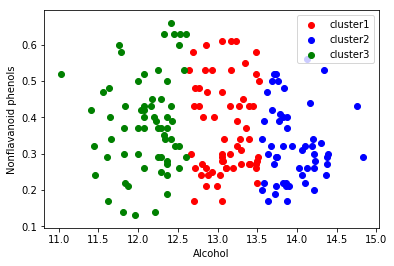

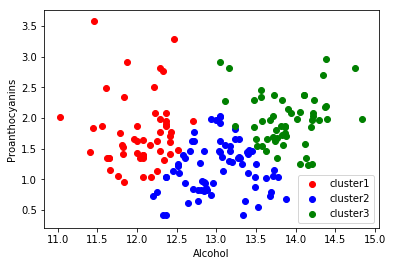

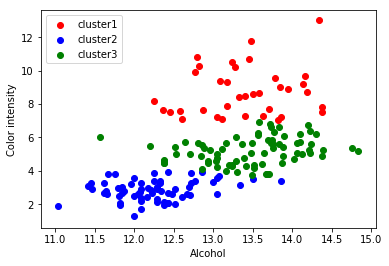

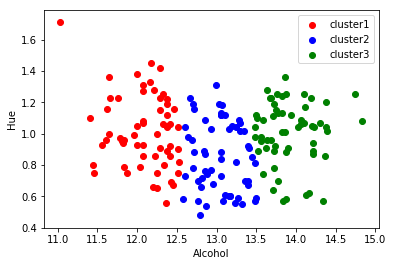

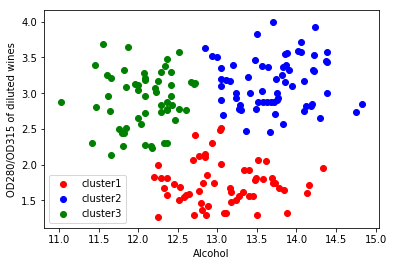

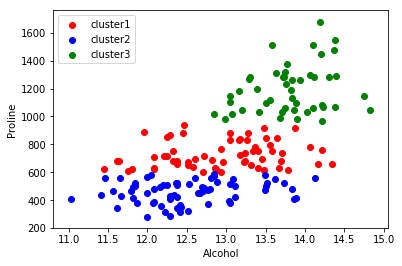

In [20]:
clust(1)

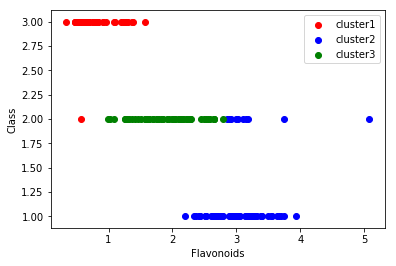

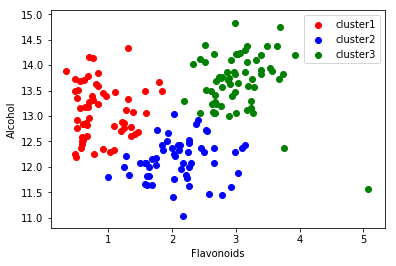

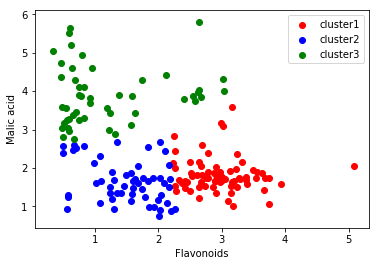

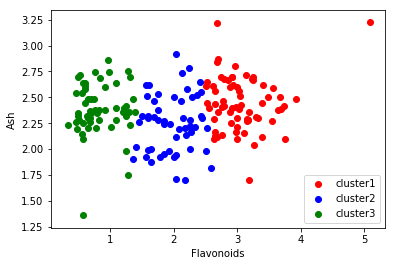

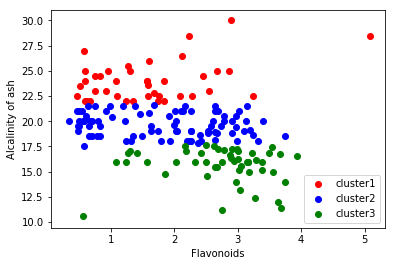

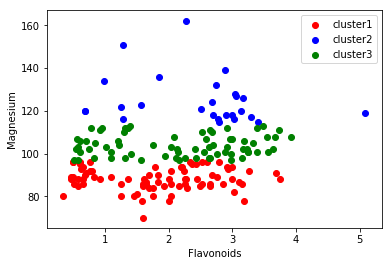

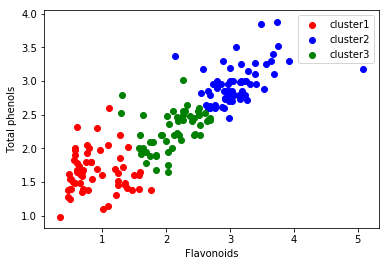

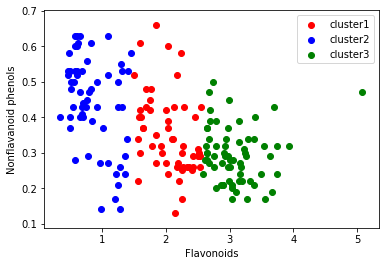

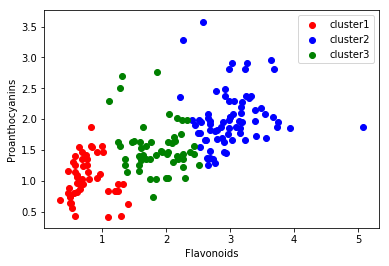

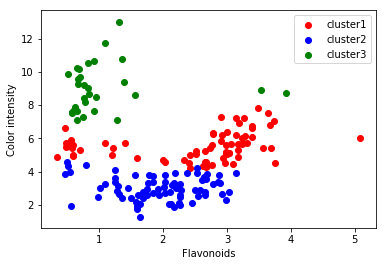

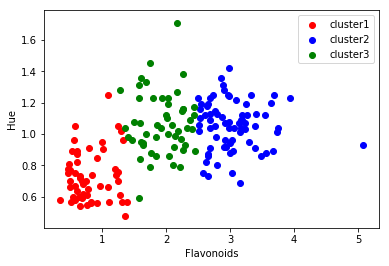

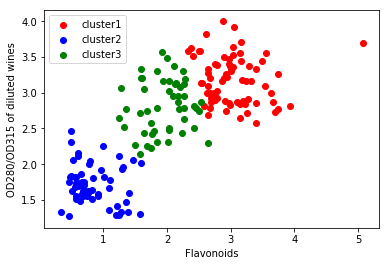

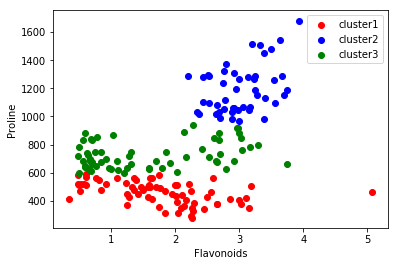

In [34]:
clust(7)

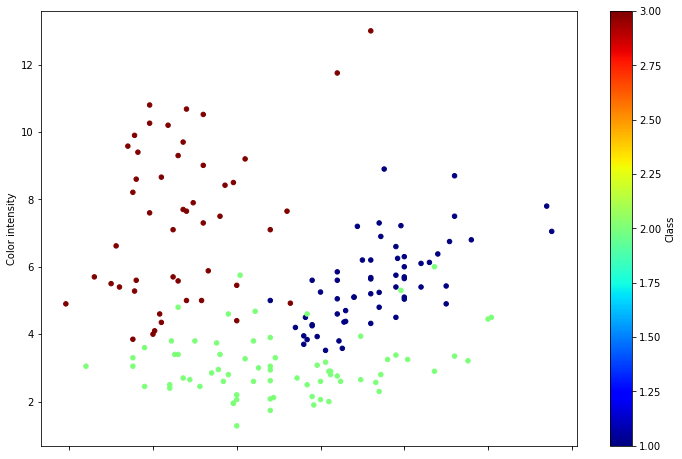

In [22]:
wines.plot.scatter(x = 'Total phenols', y = 'Color intensity', c = 'Class', figsize=(12,8), colormap='jet');

As already noticed before, all wines have are clustered by their attribute class (1,2,3), which produce very different wines, and all their features are linked by this different attributes. In fact the clusters and the class filter, generate very similar patterns of data distributions.

## 4. K-means can go wrong!

One weakness of K-means is, the algorithm's performance is closely tied with the randomly generated initial centroids quality. If the algorithm starts with a set of bad inital centroids, it will get stuck in a local minimum, without reaching the optimal solution.

The problem we are trying to solve is this one:

Given (in the general case) an Euclidian space $\mathbb{R}^{d}$
1. $\textit{Input}$: Finite set $\textit{S}\subset \mathbb{R}^{d}$ and an integer $\textit{k}$
2. $\textit{Output}$: $\textit{T} \subset \mathbb{R}^{d}$ with $|\textit{T}| = \textit{k}$
3. $\textit{Goal}$: Minimize $\textit{cost(T)}$ $ = \Sigma_{x \in \textit{S}} min_{z \in T} ||x - z||^{2}$

We are considering the squared Euclidean distance norm 2.
Finding the optimal k-means clustering is NP-hard even if k = 2, so we solve the k-means problem heuristically, iterating on the clusters to minimize the cost function. However, we don't keep count of local minimums that can stop the algorithm from reaching the best possible clusters distribution.

For example:
Let us define the set of points to be clustered as ```A = {1,2,3,4}```.
So we're trying to find 2 appropriate clusters for A (2-means). There are (at least) two different settings which satisfy the stationary condition of k-means, these are:

```Center1 = 1, Cluster1 = {1}```

```Center2 = 3, Cluster1 = {2,3,4}```

Here the cost is 2.

```Center1 = 1.5, Cluster1 = {1,2}```

```Center2 = 3.5, Cluster1 = {3,4}```

Here the cost is 1/4.

If k-means would be initialized as the first setting then it would be stuck in the local minimum, never reaching the global minimum.


Another example is this one.
Suppose the data set consists of n points in $\textit{five}$ tight clusters (of some tiny radius $\delta$) arranged in a line, with some large distance $\textit{B}$ between them.

The optimal 5-clustering has cost roughly $\delta2n$. 
If we initialize k-means by choosing five centers at random
from the data, there is some chance that we’d end up with no centers from cluster $1$, two centers from cluster
$3$, and one center each from clusters $2$, $4$, and $5$.

In the first round of k-means, all points in clusters $1$ and $2$ will be assigned to the leftmost center. The
two centers in cluster $3$ will end up sharing that cluster. And the centers in clusters $4$ and $5$ will move
roughly to the centers of those clusters.

Thereafter, no further changes will occur. This local optimum has cost $\Omega(B2n)$. ```We can make this
arbitrarily far away from the optimum cost by setting B large enough```. 
Thus, good initialization is essential.